<a href="https://colab.research.google.com/github/Anirudhakumar/DS-/blob/master/MarketMixModeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1106]:
import pandas as pd
import numpy as np
import datetime
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

import sklearn
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error as mas
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics

import warnings # supress warnings
warnings.filterwarnings('ignore')

In [1107]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1108]:
#reading the data 
data_frame=pd.read_csv("./drive/My Drive/ConsumerElectronics.csv")
media_data=pd.read_excel("./drive/My Drive/Media data and other information.xlsx",sheet_name='Media Investment')
climate_2015=pd.read_csv("./drive/My Drive/ONTARIO-2015.csv")
climate_2016=pd.read_csv("./drive/My Drive/ONTARIO-2016.csv")

In [1109]:
df=data_frame.copy()

In [1110]:
#printing some rows of data
df.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400,1,\N,\N,COD,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900,1,\N,\N,COD,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990,1,\N,\N,COD,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690,1,\N,\N,Prepaid,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618,1,\N,\N,Prepaid,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [1111]:
#checking data info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   fsn_id                           1648824 non-null  object 
 1   order_date                       1648824 non-null  object 
 2   Year                             1648824 non-null  int64  
 3   Month                            1648824 non-null  int64  
 4   order_id                         1648824 non-null  float64
 5   order_item_id                    1648824 non-null  float64
 6   gmv                              1648824 non-null  object 
 7   units                            1648824 non-null  int64  
 8   deliverybdays                    1648824 non-null  object 
 9   deliverycdays                    1648824 non-null  object 
 10  s1_fact.order_payment_type       1648824 non-null  object 
 11  sla                              1648824 non-null 

In [1112]:
#We should change the order_date data type for future use
df["order_date"]=pd.to_datetime(df["order_date"], errors='coerce')

In [1113]:
#while changing the gmv column to numeric we can find we have some data where gmv is " "
df[df["gmv"]==" "].head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
8,ACCCX3S5JGAJETYR,2015-10-16 00:49:14,2015,10,2.417870e+15,2.417870e+15,,1,\N,\N,Prepaid,9,,,CE,CameraAccessory,CameraAccessory,CameraTripod,4044,5
95,ACCCX3SGAR6NNBMR,2015-10-05 13:25:48,2015,10,2.408842e+15,2.408842e+15,,1,\N,\N,Prepaid,3,,,CE,CameraAccessory,CameraAccessory,Lens,7150,5
124,ACCCX3SGDGPZAQXD,2015-10-16 01:49:30,2015,10,4.417909e+15,4.417909e+15,,1,\N,\N,Prepaid,6,,,CE,CameraAccessory,CameraAccessory,Lens,17995,5
142,ACCCX3SGDGPZAQXD,2015-10-16 22:59:20,2015,10,4.418717e+15,4.418717e+15,,1,\N,\N,Prepaid,6,,,CE,CameraAccessory,CameraAccessory,Lens,17995,5
186,ACCCX3SGDGPZAQXD,2015-10-16 07:30:25,2015,10,4.418158e+15,4.418158e+15,,1,\N,\N,Prepaid,6,,,CE,CameraAccessory,CameraAccessory,Lens,17995,5


In [1114]:
df["gmv"].replace(" ",0,inplace=True)

In [1115]:
#we need to change the data type of gmv(Gross Merchandise Value or Revenue) to int as this is of int type
df["gmv"]=pd.to_numeric(df["gmv"])

In [1116]:
#checking shape of data
df.shape

(1648824, 20)

In [1117]:
#checking for null values in dataset
df.isnull().sum()

fsn_id                             0
order_date                         0
Year                               0
Month                              0
order_id                           0
order_item_id                      0
gmv                                0
units                              0
deliverybdays                      0
deliverycdays                      0
s1_fact.order_payment_type         0
sla                                0
cust_id                            0
pincode                            0
product_analytic_super_category    0
product_analytic_category          0
product_analytic_sub_category      0
product_analytic_vertical          0
product_mrp                        0
product_procurement_sla            0
dtype: int64

In [1118]:
df=df[(df["order_date"]>="2015-07-01") & (df["order_date"]<"2016-07-01")]

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

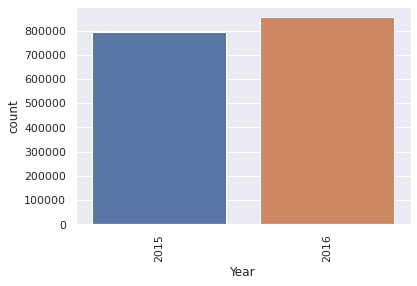

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

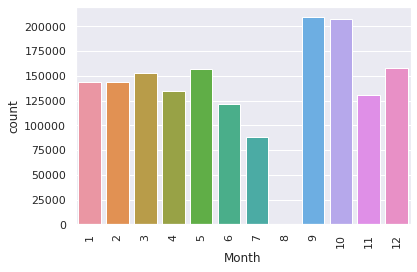

(array([0]), <a list of 1 Text major ticklabel objects>)

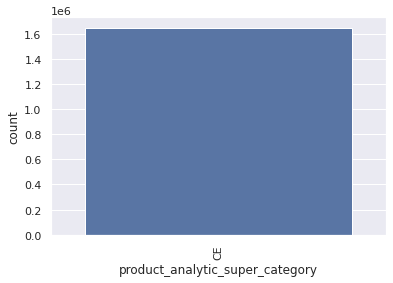

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

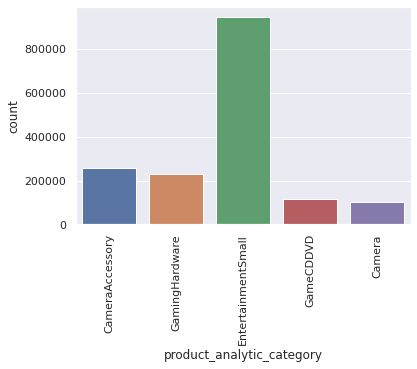

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

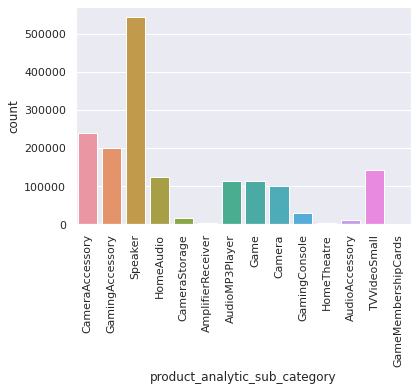

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73]), <a list of 74 Text major ticklabel objects>)

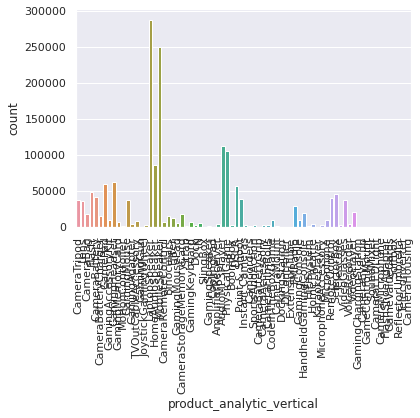

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

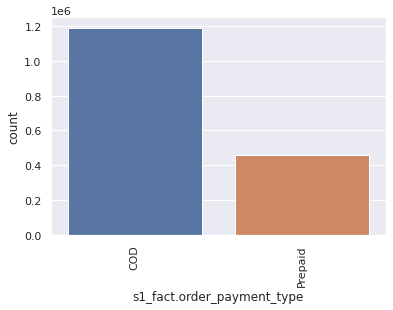

In [1119]:
arr=["Year","Month","product_analytic_super_category","product_analytic_category","product_analytic_sub_category","product_analytic_vertical","s1_fact.order_payment_type"]
for i in arr:
  sns.countplot(x=i,data=df)
  plt.xticks(rotation=90)
  plt.show()

<Figure size 576x576 with 0 Axes>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

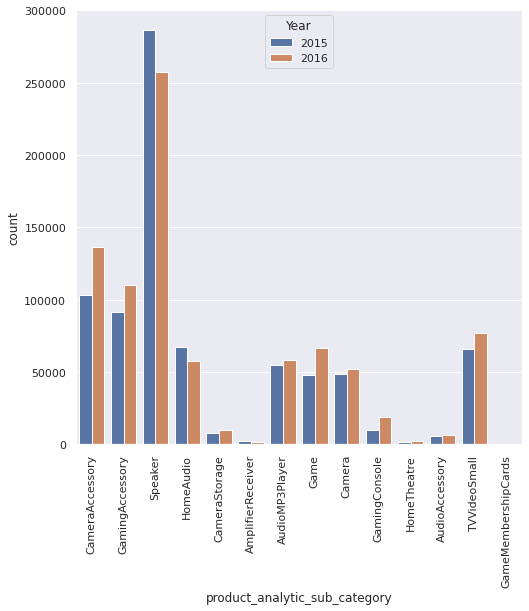

In [1120]:
plt.figure(figsize=(8,8))
sns.set(style="darkgrid")
sns.countplot(x="product_analytic_sub_category",hue="Year",data=df)
plt.xticks(rotation=90)
plt.show()

In [1121]:
#As we can see we have only 2 types of payment i am converting them into 0 and 1 that may be helpful in future calculation
df["s1_fact.order_payment_type"].replace("COD",1,inplace=True)
df["s1_fact.order_payment_type"].replace("Prepaid",0,inplace=True)

<Figure size 576x576 with 0 Axes>

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

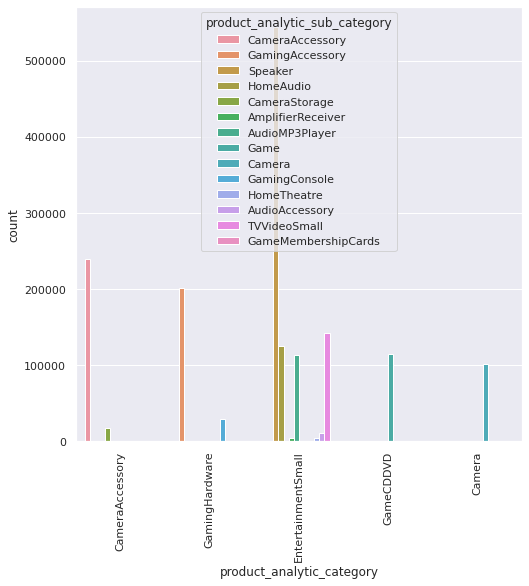

In [1122]:
plt.figure(figsize=(8,8))
sns.set(style="darkgrid")
sns.countplot(x="product_analytic_category",hue="product_analytic_sub_category",data=df)
plt.xticks(rotation=90)
plt.show()

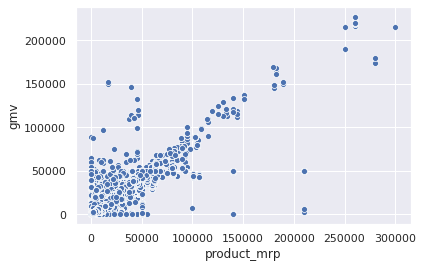

In [1123]:
sns.scatterplot(x="product_mrp",y="gmv",data=df)

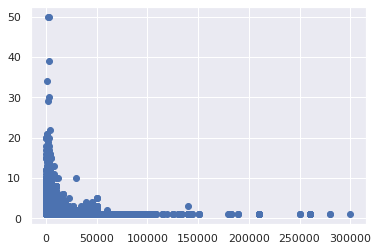

In [1124]:
plt.scatter(df["product_mrp"],df["units"])

In [1125]:
#sns.pairplot(df)

In [1126]:
df.describe()

,Year,Month,order_id,order_item_id,gmv,units,s1_fact.order_payment_type,sla,product_mrp,product_procurement_sla
count,1.648215e+06,1.648215e+06,1.648215e+06,1.648215e+06,1.648215e+06,1.648215e+06,1.648215e+06,1.648215e+06,1.648215e+06,1.648215e+06
mean,2.015518e+03,6.585501e+00,2.842324e+15,1.376019e+16,2.453656e+03,1.022088e+00,7.225750e-01,5.687996e+00,4.108187e+03,5.402785e+00
std,4.996622e-01,3.624011e+00,1.269160e+15,5.595594e+16,5.611181e+03,2.535490e-01,4.477281e-01,2.983321e+00,8.510337e+03,5.345918e+01
min,2.015000e+03,1.000000e+00,7.633152e+07,1.080165e+08,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00
25%,2.015000e+03,3.000000e+00,1.602512e+15,1.606665e+15,3.390000e+02,1.000000e+00,0.000000e+00,4.000000e+00,7.990000e+02,1.000000e+00
50%,2.016000e+03,6.000000e+00,2.611775e+15,2.619112e+15,7.490000e+02,1.000000e+00,1.000000e+00,6.000000e+00,1.599000e+03,2.000000e+00
75%,2.016000e+03,1.000000e+01,3.610554e+15,4.397703e+15,1.999000e+03,1.000000e+00,1.000000e+00,7.000000e+00,3.499000e+03,3.000000e+00
max,2.016000e+03,1.200000e+01,5.395077e+15,3.000373e+17,2.269470e+05,5.000000e+01,1.000000e+00,1.006000e+03,2.999990e+05,1.000000e+03


## Some Checks on Data like mrp should be greater than 0.

In [1127]:
#removing rows having price < 0 as we can see in the description the minimum value of price is 0. And this is not correct
df=df[df["product_mrp"]>0]

In [1128]:
#gmv(Gross Merchandise Value or Revenue) should be greater than product_mrp * units. So, removing the data which does not satisfy the criteria
df=df[df["gmv"]<df["product_mrp"]*df["units"]]

In [1129]:
#printing the shape of data after removing unwanted data
df.shape

(1583842, 20)

In [1130]:
#printing the shape of original data 
data_frame.shape

(1648824, 20)

In [1131]:
# printing %ge of data loss
round(100*((data_frame.shape[0]-df.shape[0])/data_frame.shape[0]),2)

3.94

So we are loosing only 4 percent of data . And it will not impact our analysis.

### Dividing the data on the basis of product subcategories.

In [1132]:
df["product_analytic_sub_category"].value_counts()

Speaker                533134
CameraAccessory        229488
GamingAccessory        196023
TVVideoSmall           140852
HomeAudio              118542
AudioMP3Player         111349
Camera                  99576
Game                    91021
GamingConsole           27605
CameraStorage           17695
AudioAccessory          10302
HomeTheatre              4141
AmplifierReceiver        4017
GameMembershipCards        97
Name: product_analytic_sub_category, dtype: int64

In [1133]:
df_homeaudio=df[df["product_analytic_sub_category"] == "HomeAudio"].copy()

In [1134]:
df_CameraAccessory=df[df["product_analytic_sub_category"] == "CameraAccessory"].copy()

In [1135]:
df_GamingAccessory=df[df["product_analytic_sub_category"] == "GamingAccessory"].copy()

In [1136]:
#printing some data from each of the data frame
df_homeaudio.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
2840,ACCCZZC9XHZZ49FS,2015-10-03 20:35:30,2015,10,1.407396e+15,1.407396e+15,7049.0,1,\N,\N,0,5,-7.59891246232286E+018,-1.44900165321989E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5
2841,ACCCZZC9XHZZ49FS,2015-10-16 09:03:09,2015,10,2.418214e+15,2.418214e+15,5489.0,1,\N,\N,0,2,-2.19573032414406E+018,5.51019732830323E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5
2842,ACCCZZC9XHZZ49FS,2015-10-16 21:55:31,2015,10,2.418676e+15,2.418676e+15,6255.0,1,\N,\N,0,9,-8.69764155132085E+018,4.07895330887739E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5
2843,ACCCZZC9XHZZ49FS,2015-10-16 23:25:07,2015,10,1.418727e+15,1.418727e+15,6099.0,1,\N,\N,0,3,-4.98961621154979E+018,9.06892083579869E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5
2844,ACCCZZC9XHZZ49FS,2015-10-20 17:42:59,2015,10,2.421984e+15,2.421984e+15,6850.0,1,\N,\N,1,9,6.04651405718702E+018,2.15973604441674E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5


In [1137]:
df_CameraAccessory.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400.0,1,\N,\N,1,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900.0,1,\N,\N,1,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990.0,1,\N,\N,1,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690.0,1,\N,\N,0,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618.0,1,\N,\N,0,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3


In [1138]:
df_GamingAccessory.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
1598,ACCCZ34CBVZJTVQF,2015-10-04 19:24:36,2015,10,1.408217e+15,1.408217e+15,3075.0,1,\N,\N,1,9,4.34477146699389E+018,-1.78050760490657E+018,CE,GamingHardware,GamingAccessory,GamePad,3999,5
1599,ACCCZ34CBVZJTVQF,2015-10-14 22:54:54,2015,10,1.416985e+15,1.416985e+15,2750.0,1,\N,\N,1,7,9.04157730463172E+018,-5.1750058942027E+018,CE,GamingHardware,GamingAccessory,GamePad,3999,5
1600,ACCCZ34CBVZJTVQF,2015-10-15 20:19:38,2015,10,1.417669e+15,1.417669e+15,2899.0,1,\N,\N,0,5,8.97383112414031E+018,-7.07126047139944E+017,CE,GamingHardware,GamingAccessory,GamePad,3999,5
1601,ACCCZ34CBVZJTVQF,2015-10-17 18:21:43,2015,10,1.419415e+15,1.419415e+15,2609.0,1,\N,\N,0,5,-4.82414273647179E+018,6.40491320207757E+018,CE,GamingHardware,GamingAccessory,GamePad,3999,5
1602,ACCCZ34CBVZJTVQF,2015-10-26 17:49:39,2015,10,1.427168e+15,1.427168e+15,2772.0,1,\N,\N,0,5,-3.30536529726028E+018,2.08941992580576E+018,CE,GamingHardware,GamingAccessory,GamePad,3999,5


In [1139]:
#printing the shape of all the three data frame
print(df_CameraAccessory.shape)
print(df_GamingAccessory.shape)
print(df_homeaudio.shape)

(229488, 20)
(196023, 20)
(118542, 20)


In [1140]:
df_homeaudio.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla
2840,ACCCZZC9XHZZ49FS,2015-10-03 20:35:30,2015,10,1.407396e+15,1.407396e+15,7049.0,1,\N,\N,0,5,-7.59891246232286E+018,-1.44900165321989E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5
2841,ACCCZZC9XHZZ49FS,2015-10-16 09:03:09,2015,10,2.418214e+15,2.418214e+15,5489.0,1,\N,\N,0,2,-2.19573032414406E+018,5.51019732830323E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5
2842,ACCCZZC9XHZZ49FS,2015-10-16 21:55:31,2015,10,2.418676e+15,2.418676e+15,6255.0,1,\N,\N,0,9,-8.69764155132085E+018,4.07895330887739E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5
2843,ACCCZZC9XHZZ49FS,2015-10-16 23:25:07,2015,10,1.418727e+15,1.418727e+15,6099.0,1,\N,\N,0,3,-4.98961621154979E+018,9.06892083579869E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5
2844,ACCCZZC9XHZZ49FS,2015-10-20 17:42:59,2015,10,2.421984e+15,2.421984e+15,6850.0,1,\N,\N,1,9,6.04651405718702E+018,2.15973604441674E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5


In [1141]:
#Adding Week column in the each data frame
df_CameraAccessory['order_week'] = df_CameraAccessory['order_date'].dt.week
df_CameraAccessory.loc[(df_CameraAccessory.Year == 2016) & (df_CameraAccessory['order_date'].dt.week !=53), 'order_week'] = 53+df_CameraAccessory['order_date'].dt.week
df_GamingAccessory[ 'order_week'] = df_GamingAccessory['order_date'].dt.week
df_GamingAccessory.loc[(df_GamingAccessory.Year == 2016) & (df_GamingAccessory['order_date'].dt.week !=53),'order_week'] = 53+df_GamingAccessory['order_date'].dt.week
df_homeaudio['order_week'] = df_homeaudio['order_date'].dt.week
df_homeaudio.loc[(df_homeaudio.Year == 2016) & (df_homeaudio['order_date'].dt.week !=53),'order_week'] = 53+df_homeaudio['order_date'].dt.week

In [1142]:
#Printing some rows of modified data frame
df_homeaudio.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_week
2840,ACCCZZC9XHZZ49FS,2015-10-03 20:35:30,2015,10,1.407396e+15,1.407396e+15,7049.0,1,\N,\N,0,5,-7.59891246232286E+018,-1.44900165321989E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5,40
2841,ACCCZZC9XHZZ49FS,2015-10-16 09:03:09,2015,10,2.418214e+15,2.418214e+15,5489.0,1,\N,\N,0,2,-2.19573032414406E+018,5.51019732830323E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5,42
2842,ACCCZZC9XHZZ49FS,2015-10-16 21:55:31,2015,10,2.418676e+15,2.418676e+15,6255.0,1,\N,\N,0,9,-8.69764155132085E+018,4.07895330887739E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5,42
2843,ACCCZZC9XHZZ49FS,2015-10-16 23:25:07,2015,10,1.418727e+15,1.418727e+15,6099.0,1,\N,\N,0,3,-4.98961621154979E+018,9.06892083579869E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5,42
2844,ACCCZZC9XHZZ49FS,2015-10-20 17:42:59,2015,10,2.421984e+15,2.421984e+15,6850.0,1,\N,\N,1,9,6.04651405718702E+018,2.15973604441674E+018,CE,EntertainmentSmall,HomeAudio,HomeAudioSpeaker,7499,5,43


<Figure size 864x864 with 0 Axes>

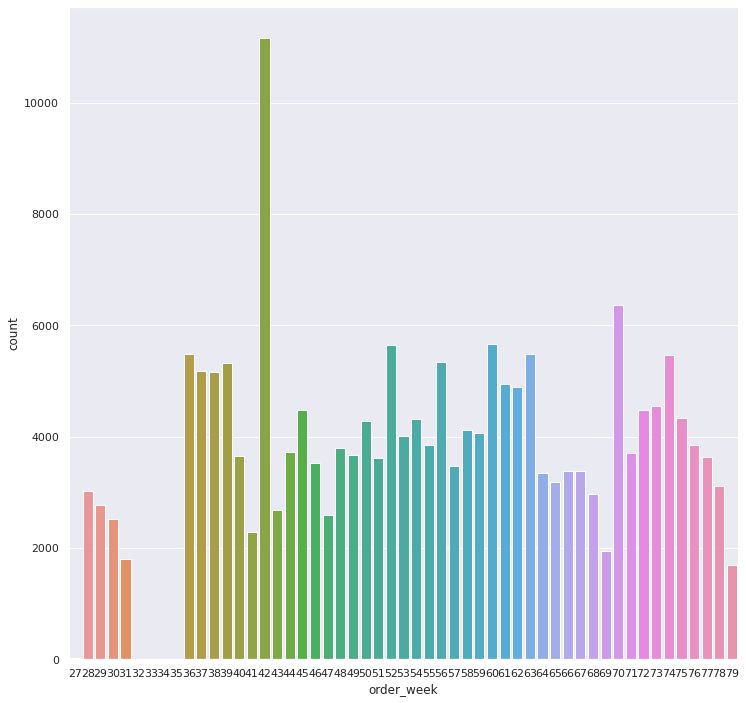

In [1143]:
plt.figure(figsize=(12,12))
sns.countplot(x="order_week",data=df_GamingAccessory)
plt.show()

Adding Discount column in all the data frame 

In [1144]:
df_CameraAccessory['Discount'] = (df_CameraAccessory['product_mrp']-df_CameraAccessory['gmv'])/df_CameraAccessory['units']

In [1145]:
df_GamingAccessory['Discount'] = (df_GamingAccessory['product_mrp']-df_GamingAccessory['gmv'])/df_GamingAccessory['units']
df_homeaudio['Discount'] = (df_homeaudio['product_mrp']-df_homeaudio['gmv'])/df_homeaudio['units']

In [1146]:
df_CameraAccessory.head()

,fsn_id,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact.order_payment_type,sla,cust_id,pincode,product_analytic_super_category,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,order_week,Discount
0,ACCCX3S58G7B5F6P,2015-10-17 15:11:54,2015,10,3.419301e+15,3.419301e+15,6400.0,1,\N,\N,1,5,-1.01299130778588E+018,-7.79175582905735E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,42,790.0
1,ACCCX3S58G7B5F6P,2015-10-19 10:07:22,2015,10,1.420831e+15,1.420831e+15,6900.0,1,\N,\N,1,7,-8.99032457905512E+018,7.33541149097431E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,7190,0,43,290.0
2,ACCCX3S5AHMF55FV,2015-10-20 15:45:56,2015,10,2.421913e+15,2.421913e+15,1990.0,1,\N,\N,1,10,-1.0404429420466E+018,-7.47768776228657E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,43,109.0
3,ACCCX3S5AHMF55FV,2015-10-14 12:05:15,2015,10,4.416592e+15,4.416592e+15,1690.0,1,\N,\N,0,4,-7.60496084352714E+018,-5.83593163877661E+018,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,42,409.0
4,ACCCX3S5AHMF55FV,2015-10-17 21:25:03,2015,10,4.419525e+15,4.419525e+15,1618.0,1,\N,\N,0,6,2.8945572083453E+018,5.34735360997242E+017,CE,CameraAccessory,CameraAccessory,CameraTripod,2099,3,42,481.0


In [1147]:
CameraAccessory=round(df_CameraAccessory.groupby("order_week")["Year","Month","gmv","units","sla","product_mrp","Discount"].mean())

In [1148]:
#printing some rows of the gropped data frame 
CameraAccessory.head()

,Year,Month,gmv,units,sla,product_mrp,Discount
order_week,,,,,,,
27,2015.0,7.0,674.0,1.0,2.0,1512.0,838.0
28,2015.0,7.0,1372.0,1.0,7.0,2488.0,1105.0
29,2015.0,7.0,1488.0,1.0,6.0,2567.0,1079.0
30,2015.0,7.0,1454.0,1.0,6.0,2571.0,1121.0
31,2015.0,7.0,1464.0,1.0,6.0,2498.0,1034.0


In [1149]:
GamingAccessory=round(df_GamingAccessory.groupby("order_week")["Year","Month","gmv","units","sla","product_mrp","Discount"].mean())

In [1150]:
GamingAccessory.head()

,Year,Month,gmv,units,sla,product_mrp,Discount
order_week,,,,,,,
27,2015.0,7.0,1294.0,1.0,3.0,3766.0,2480.0
28,2015.0,7.0,899.0,1.0,5.0,1828.0,939.0
29,2015.0,7.0,828.0,1.0,5.0,1805.0,983.0
30,2015.0,7.0,1038.0,1.0,5.0,2322.0,1281.0
31,2015.0,7.0,1038.0,1.0,6.0,5045.0,4027.0


In [1151]:
homeaudio=round(df_homeaudio.groupby("order_week")["Year","Month","gmv","units","sla","product_mrp","Discount"].mean())

In [1152]:
homeaudio.head()

,Year,Month,gmv,units,sla,product_mrp,Discount
order_week,,,,,,,
27,2015.0,7.0,2733.0,1.0,3.0,4712.0,1980.0
28,2015.0,7.0,2208.0,1.0,8.0,3512.0,1310.0
29,2015.0,7.0,2209.0,1.0,7.0,3622.0,1415.0
30,2015.0,7.0,2126.0,1.0,7.0,3554.0,1430.0
31,2015.0,7.0,2183.0,1.0,7.0,3606.0,1425.0


Working and Merging data with main data frame

In [1153]:
media_data.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,NPS,Stock Index
0,2015,7,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,54.599588,1177
1,2015,8,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,59.987101,1206
2,2015,9,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,6.202149,46.925419,1101
3,2015,10,170.156297,6.144711,12.622480,84.672532,3.444075,24.371778,6.973711,31.927011,44.398389,1210
4,2015,11,51.216220,4.220630,1.275469,14.172116,0.168633,19.561574,6.595767,5.222032,47.000000,1233


In [1154]:
#Adding addstock variable
media_data["Adstock_Digital"] =media_data["Digital"] + (0.5 * media_data["Digital"].shift(1))
media_data["Adstock_Sponsorship"] =media_data["Sponsorship"]+ (0.5 * media_data["Sponsorship"].shift(1))
media_data["Adstock_Online marketing"] =media_data["Online marketing"] + (0.5 * media_data["Online marketing"].shift(1))
media_data["Adstock_Digital"][0] =media_data["Digital"][0]
media_data["Adstock_Sponsorship"][0] =media_data["Sponsorship"][0]
media_data["Adstock_Online marketing"][0] =media_data["Online marketing"][0]

In [1155]:
media_data.head()

,Year,Month,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,NPS,Stock Index,Adstock_Digital,Adstock_Sponsorship,Adstock_Online marketing
0,2015,7,17.061775,0.215330,2.533014,7.414270,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.414270,1.327278
1,2015,8,5.064306,0.006438,1.278074,1.063332,0.000006,0.129244,0.073684,2.513528,59.987101,1206,2.544581,4.770467,0.792883
2,2015,9,96.254380,3.879504,1.356528,62.787651,0.610292,16.379990,5.038266,6.202149,46.925419,1101,1.995564,63.319317,16.444612
3,2015,10,170.156297,6.144711,12.622480,84.672532,3.444075,24.371778,6.973711,31.927011,44.398389,1210,13.300744,116.066357,32.561773
4,2015,11,51.216220,4.220630,1.275469,14.172116,0.168633,19.561574,6.595767,5.222032,47.000000,1233,7.586709,56.508382,31.747463


In [1156]:
CameraAccessory.reset_index(inplace=True)
camedia=CameraAccessory.merge(media_data,how="inner",on=["Year","Month"])

In [1157]:
camedia.head()

,order_week,Year,Month,gmv,units,sla,product_mrp,Discount,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,NPS,Stock Index,Adstock_Digital,Adstock_Sponsorship,Adstock_Online marketing
0,27,2015.0,7.0,674.0,1.0,2.0,1512.0,838.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278
1,28,2015.0,7.0,1372.0,1.0,7.0,2488.0,1105.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278
2,29,2015.0,7.0,1488.0,1.0,6.0,2567.0,1079.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278
3,30,2015.0,7.0,1454.0,1.0,6.0,2571.0,1121.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278
4,31,2015.0,7.0,1464.0,1.0,6.0,2498.0,1034.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278


In [1158]:
homeaudio.reset_index(inplace=True)

In [1159]:
hamedia=homeaudio.merge(media_data,how="inner",on=["Year","Month"])

In [1160]:
hamedia.head()

,order_week,Year,Month,gmv,units,sla,product_mrp,Discount,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,NPS,Stock Index,Adstock_Digital,Adstock_Sponsorship,Adstock_Online marketing
0,27,2015.0,7.0,2733.0,1.0,3.0,4712.0,1980.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278
1,28,2015.0,7.0,2208.0,1.0,8.0,3512.0,1310.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278
2,29,2015.0,7.0,2209.0,1.0,7.0,3622.0,1415.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278
3,30,2015.0,7.0,2126.0,1.0,7.0,3554.0,1430.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278
4,31,2015.0,7.0,2183.0,1.0,7.0,3606.0,1425.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278


In [1161]:
GamingAccessory.reset_index(inplace=True)
gamedia=GamingAccessory.merge(media_data,how="inner",on=["Year","Month"])

In [1162]:
gamedia.head()

,order_week,Year,Month,gmv,units,sla,product_mrp,Discount,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,NPS,Stock Index,Adstock_Digital,Adstock_Sponsorship,Adstock_Online marketing
0,27,2015.0,7.0,1294.0,1.0,3.0,3766.0,2480.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278
1,28,2015.0,7.0,899.0,1.0,5.0,1828.0,939.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278
2,29,2015.0,7.0,828.0,1.0,5.0,1805.0,983.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278
3,30,2015.0,7.0,1038.0,1.0,5.0,2322.0,1281.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278
4,31,2015.0,7.0,1038.0,1.0,6.0,5045.0,4027.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278


Working on climate data

In [1163]:
climate_2015.shape

(365, 27)

In [1164]:
climate_2016.shape

(366, 27)

In [1165]:
climate_2015.isnull().sum()

Date/Time                      0
Year                           0
Month                          0
Day                            0
Data Quality                 136
Max Temp (°C)                149
Max Temp Flag                352
Min Temp (°C)                175
Min Temp Flag                326
Mean Temp (°C)               175
Mean Temp Flag               326
Heat Deg Days (°C)           175
Heat Deg Days Flag           326
Cool Deg Days (°C)           175
Cool Deg Days Flag           326
Total Rain (mm)              136
Total Rain Flag              358
Total Snow (cm)              136
Total Snow Flag              356
Total Precip (mm)            136
Total Precip Flag            353
Snow on Grnd (cm)            136
Snow on Grnd Flag            363
Dir of Max Gust (10s deg)    365
Dir of Max Gust Flag         365
Spd of Max Gust (km/h)       365
Spd of Max Gust Flag         365
dtype: int64

In [1166]:
climate_2016.isnull().sum()

Date/Time                      0
Year                           0
Month                          0
Day                            0
Data Quality                 139
Max Temp (°C)                140
Max Temp Flag                365
Min Temp (°C)                147
Min Temp Flag                358
Mean Temp (°C)               147
Mean Temp Flag               358
Heat Deg Days (°C)           147
Heat Deg Days Flag           358
Cool Deg Days (°C)           147
Cool Deg Days Flag           358
Total Rain (mm)              139
Total Rain Flag              363
Total Snow (cm)              139
Total Snow Flag              359
Total Precip (mm)            139
Total Precip Flag            359
Snow on Grnd (cm)            139
Snow on Grnd Flag            360
Dir of Max Gust (10s deg)    366
Dir of Max Gust Flag         366
Spd of Max Gust (km/h)       366
Spd of Max Gust Flag         366
dtype: int64

In [1167]:
#dropping Unwanted columns from both the data frame
columns=["Data Quality","Spd of Max Gust Flag","Spd of Max Gust (km/h)","Dir of Max Gust Flag","Dir of Max Gust (10s deg)","Snow on Grnd Flag","Total Precip Flag","Total Snow Flag","Total Rain Flag"
          ,"Cool Deg Days Flag","Heat Deg Days Flag","Mean Temp Flag","Min Temp Flag","Max Temp Flag"]
climate_2015.drop(columns,axis=1,inplace=True)


In [1168]:
climate_2016.drop(columns,axis=1,inplace=True)

In [1169]:
climate_2015.head()

,Date/Time,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,2015-01-01,2015,1,1,0.0,-8.5,-4.3,22.3,0.0,0.0,0.0,0.0,0.0
1,2015-01-02,2015,1,2,3.0,-3.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0
2,2015-01-03,2015,1,3,2.5,-4.0,-0.8,18.8,0.0,24.0,0.0,24.0,0.0
3,2015-01-04,2015,1,4,2.5,0.0,1.3,16.7,0.0,0.0,1.0,1.0,0.0
4,2015-01-05,2015,1,5,-10.0,-13.5,-11.8,29.8,0.0,0.0,3.0,3.0,1.0


In [1170]:
#printing shape of both the dataframe
print(climate_2015.shape)
print(climate_2016.shape)

(365, 13)
(366, 13)


In [1171]:
#concatting both the data frame
climate=climate_2015.append(climate_2016)

In [1172]:
climate=climate[(climate["Date/Time"]>="2015-07-01") & (climate["Date/Time"]<"2016-07-01")]

In [1173]:
climate.reset_index(inplace=True)

In [1174]:
climate['Date/Time'] = pd.to_datetime(climate['Date/Time'],errors='coerce')

In [1175]:
climate['week'] = climate['Date/Time'].dt.week
climate.loc[(climate.Year == 2016) & (climate['Date/Time'].dt.week !=53), 'week'] = 53+climate['Date/Time'].dt.week

In [1176]:
climate.drop("index",axis=1,inplace=True)

In [1177]:
gropped_climate=round(climate.groupby("week").mean())

In [1178]:
gropped_climate.head()

,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
week,,,,,,,,,,,,
27,2015.0,7.0,3.0,26.0,13.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0
28,2015.0,7.0,9.0,25.0,15.0,20.0,0.0,2.0,4.0,0.0,4.0,0.0
29,2015.0,7.0,16.0,29.0,18.0,23.0,0.0,5.0,1.0,0.0,1.0,0.0
30,2015.0,7.0,23.0,30.0,17.0,23.0,0.0,5.0,1.0,0.0,1.0,0.0
31,2015.0,7.0,21.0,32.0,18.0,25.0,0.0,7.0,5.0,0.0,5.0,0.0


In [1179]:
camedia.shape

(52, 21)

In [1180]:
gropped_climate.shape

(53, 12)

Merging climate data in all three dataframe

In [1181]:
gropped_climate.reset_index(inplace=True)
camdcl=camedia.merge(gropped_climate,how="inner",left_on="order_week",right_on="week")

In [1182]:
camdcl.head()

,order_week,Year_x,Month_x,gmv,units,sla,product_mrp,Discount,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,NPS,Stock Index,Adstock_Digital,Adstock_Sponsorship,Adstock_Online marketing,week,Year_y,Month_y,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,27,2015.0,7.0,674.0,1.0,2.0,1512.0,838.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,27,2015.0,7.0,3.0,26.0,13.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0
1,28,2015.0,7.0,1372.0,1.0,7.0,2488.0,1105.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,28,2015.0,7.0,9.0,25.0,15.0,20.0,0.0,2.0,4.0,0.0,4.0,0.0
2,29,2015.0,7.0,1488.0,1.0,6.0,2567.0,1079.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,29,2015.0,7.0,16.0,29.0,18.0,23.0,0.0,5.0,1.0,0.0,1.0,0.0
3,30,2015.0,7.0,1454.0,1.0,6.0,2571.0,1121.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,30,2015.0,7.0,23.0,30.0,17.0,23.0,0.0,5.0,1.0,0.0,1.0,0.0
4,31,2015.0,7.0,1464.0,1.0,6.0,2498.0,1034.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,31,2015.0,7.0,21.0,32.0,18.0,25.0,0.0,7.0,5.0,0.0,5.0,0.0


In [1183]:
gamdcl=gamedia.merge(gropped_climate,how="inner",left_on="order_week",right_on="week")

In [1184]:
hamdcl=hamedia.merge(gropped_climate,how="inner",left_on="order_week",right_on="week")

In [1185]:
gamdcl.head()

,order_week,Year_x,Month_x,gmv,units,sla,product_mrp,Discount,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,NPS,Stock Index,Adstock_Digital,Adstock_Sponsorship,Adstock_Online marketing,week,Year_y,Month_y,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,27,2015.0,7.0,1294.0,1.0,3.0,3766.0,2480.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,27,2015.0,7.0,3.0,26.0,13.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0
1,28,2015.0,7.0,899.0,1.0,5.0,1828.0,939.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,28,2015.0,7.0,9.0,25.0,15.0,20.0,0.0,2.0,4.0,0.0,4.0,0.0
2,29,2015.0,7.0,828.0,1.0,5.0,1805.0,983.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,29,2015.0,7.0,16.0,29.0,18.0,23.0,0.0,5.0,1.0,0.0,1.0,0.0
3,30,2015.0,7.0,1038.0,1.0,5.0,2322.0,1281.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,30,2015.0,7.0,23.0,30.0,17.0,23.0,0.0,5.0,1.0,0.0,1.0,0.0
4,31,2015.0,7.0,1038.0,1.0,6.0,5045.0,4027.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,31,2015.0,7.0,21.0,32.0,18.0,25.0,0.0,7.0,5.0,0.0,5.0,0.0


In [1186]:
hamdcl.head()

,order_week,Year_x,Month_x,gmv,units,sla,product_mrp,Discount,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,NPS,Stock Index,Adstock_Digital,Adstock_Sponsorship,Adstock_Online marketing,week,Year_y,Month_y,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,27,2015.0,7.0,2733.0,1.0,3.0,4712.0,1980.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,27,2015.0,7.0,3.0,26.0,13.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0
1,28,2015.0,7.0,2208.0,1.0,8.0,3512.0,1310.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,28,2015.0,7.0,9.0,25.0,15.0,20.0,0.0,2.0,4.0,0.0,4.0,0.0
2,29,2015.0,7.0,2209.0,1.0,7.0,3622.0,1415.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,29,2015.0,7.0,16.0,29.0,18.0,23.0,0.0,5.0,1.0,0.0,1.0,0.0
3,30,2015.0,7.0,2126.0,1.0,7.0,3554.0,1430.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,30,2015.0,7.0,23.0,30.0,17.0,23.0,0.0,5.0,1.0,0.0,1.0,0.0
4,31,2015.0,7.0,2183.0,1.0,7.0,3606.0,1425.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,31,2015.0,7.0,21.0,32.0,18.0,25.0,0.0,7.0,5.0,0.0,5.0,0.0


In [1187]:
print(gamdcl.shape)
print(hamdcl.shape)
print(camdcl.shape)

(53, 34)
(50, 34)
(52, 34)


		Holiday list
	2015	 
         (18-19th July)
		     (15-17th Aug)
		     (28-30th Aug)
		     (17-15th Oct)
		     (7-14th Nov)
		    (25th Dec'15 - 3rd Jan'16)
	2016	 
    (20-22 Jan)
		(1-2 Feb)
		(20-21 Feb)
		(14-15 Feb)
		(7-9 Mar)
		(25-27 May)

In [1188]:
#making a list of holidays
holidays=pd.DataFrame(["2015-07-18","2015-07-19","2015-08-15","2015-08-16","2015-08-17","2015-08-28","2015-08-29","2015-08-30","2015-10-15","2015-10-16","2015-10-17",
          "2015-11-07","2015-11-08","2015-11-09","2015-11-10","2015-11-11","2015-11-12","2015-11-13","2015-11-14","2015-12-25","2015-12-26","2015-12-27"
          ,"2015-12-28","2015-12-29","2015-12-30","2015-12-31","2016-01-01","2016-01-02","2016-01-03","2016-01-20","2016-01-21","2016-01-22",
          "2016-02-01","2016-02-02","2016-02-20","2016-02-21","2016-02-14","2016-02-15","2016-03-07","2016-03-08","2016-03-09","2016-05-25","2016-05-26","2016-05-27"],columns=["Date"])

In [1189]:
holidays["Date"]=pd.to_datetime(holidays.Date)

In [1190]:
holidays['week'] = holidays['Date'].dt.week
holidays.loc[(holidays['Date'].dt.year == 2016) & (holidays['Date'].dt.week !=53), 'week'] = 53+holidays['Date'].dt.week

In [1191]:
holidays.head()

,Date,week
0,2015-07-18,29
1,2015-07-19,29
2,2015-08-15,33
3,2015-08-16,33
4,2015-08-17,34


In [1192]:
#Adding holidays flag to main dataframe
gamdcl["holidays"]=gamdcl.week.isin(holidays.week).astype(np.int8)
camdcl["holidays"]=camdcl.week.isin(holidays.week).astype(np.int8)
hamdcl["holidays"] = hamdcl.week.isin(holidays.week).astype(np.int8)

PayDay Addition
As we know only 1st and 15th of month is payday.we will find weeks for all the months.

In [1193]:
payday=pd.DataFrame(["2015-07-01","2015-07-15","2015-08-01","2015-08-15","2015-09-01","2015-09-15","2015-10-01","2015-10-15","2015-11-01","2015-11-15","2015-12-01",
                     "2015-12-15","2016-01-01","2016-01-15","2016-02-01","2016-02-15","2016-03-01","2016-03-15","2016-04-01","2016-04-15","2016-05-01","2016-05-15",
                     "2016-06-01","2016-06-15"],columns=["Date"])

In [1194]:
payday["Date"]=pd.to_datetime(payday.Date)

In [1195]:
payday.head()

,Date
0,2015-07-01
1,2015-07-15
2,2015-08-01
3,2015-08-15
4,2015-09-01


In [1196]:
payday['week'] = payday['Date'].dt.week
payday.loc[(payday['Date'].dt.year == 2016) & (payday['Date'].dt.week !=53), 'week'] = 53+payday['Date'].dt.week

In [1197]:
#Adding payday flag to main dataframe
gamdcl["payday"]=gamdcl.week.isin(payday.week).astype(np.int8)
camdcl["payday"]=camdcl.week.isin(payday.week).astype(np.int8)
hamdcl["payday"] = hamdcl.week.isin(payday.week).astype(np.int8)

In [1198]:
gamdcl.head()

,order_week,Year_x,Month_x,gmv,units,sla,product_mrp,Discount,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,NPS,Stock Index,Adstock_Digital,Adstock_Sponsorship,Adstock_Online marketing,week,Year_y,Month_y,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),holidays,payday
0,27,2015.0,7.0,1294.0,1.0,3.0,3766.0,2480.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,27,2015.0,7.0,3.0,26.0,13.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1
1,28,2015.0,7.0,899.0,1.0,5.0,1828.0,939.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,28,2015.0,7.0,9.0,25.0,15.0,20.0,0.0,2.0,4.0,0.0,4.0,0.0,0,0
2,29,2015.0,7.0,828.0,1.0,5.0,1805.0,983.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,29,2015.0,7.0,16.0,29.0,18.0,23.0,0.0,5.0,1.0,0.0,1.0,0.0,1,1
3,30,2015.0,7.0,1038.0,1.0,5.0,2322.0,1281.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,30,2015.0,7.0,23.0,30.0,17.0,23.0,0.0,5.0,1.0,0.0,1.0,0.0,0,0
4,31,2015.0,7.0,1038.0,1.0,6.0,5045.0,4027.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,31,2015.0,7.0,21.0,32.0,18.0,25.0,0.0,7.0,5.0,0.0,5.0,0.0,0,1


In [1199]:
#dropping Year_x and month_x from each of the df.
gamdcl.drop(["Year_x","Month_x","week"],axis=1,inplace=True)
hamdcl.drop(["Year_x","Month_x","week"],axis=1,inplace=True)
camdcl.drop(["Year_x","Month_x","week"],axis=1,inplace=True)

In [1200]:
gamdcl.isnull().sum()

order_week                  0
gmv                         0
units                       0
sla                         0
product_mrp                 0
Discount                    0
Total Investment            0
TV                          0
Digital                     0
Sponsorship                 0
Content Marketing           0
Online marketing            0
 Affiliates                 0
SEM                         0
NPS                         0
Stock Index                 0
Adstock_Digital             0
Adstock_Sponsorship         0
Adstock_Online marketing    0
Year_y                      0
Month_y                     0
Day                         0
Max Temp (°C)               0
Min Temp (°C)               1
Mean Temp (°C)              1
Heat Deg Days (°C)          1
Cool Deg Days (°C)          1
Total Rain (mm)             0
Total Snow (cm)             0
Total Precip (mm)           0
Snow on Grnd (cm)           0
holidays                    0
payday                      0
dtype: int

In [1201]:
gamdcl["Min Temp (°C)"].mean()

7.076923076923077

In [1202]:
#filling null value by columns mean
gamdcl["Min Temp (°C)"].fillna(gamdcl["Min Temp (°C)"].mean(),inplace=True)
gamdcl["Mean Temp (°C)"].fillna(gamdcl["Mean Temp (°C)"].mean(),inplace=True) 
gamdcl["Heat Deg Days (°C)"].fillna(gamdcl["Heat Deg Days (°C)"].mean(),inplace=True) 
gamdcl["Cool Deg Days (°C)"].fillna(gamdcl["Cool Deg Days (°C)"].mean(),inplace=True)  

In [1244]:
hamdcl.isnull().sum()

order_week                  0
gmv                         0
units                       0
sla                         0
product_mrp                 0
Discount                    0
Total Investment            0
TV                          0
Digital                     0
Sponsorship                 0
Content Marketing           0
Online marketing            0
 Affiliates                 0
SEM                         0
NPS                         0
Stock Index                 0
Adstock_Digital             0
Adstock_Sponsorship         0
Adstock_Online marketing    0
Year_y                      0
Month_y                     0
Day                         0
Max Temp (°C)               0
Min Temp (°C)               1
Mean Temp (°C)              1
Heat Deg Days (°C)          1
Cool Deg Days (°C)          1
Total Rain (mm)             0
Total Snow (cm)             0
Total Precip (mm)           0
Snow on Grnd (cm)           0
holidays                    0
payday                      0
dtype: int

Preparing Modeling for all the gamdcl data frame.

In [1203]:
#train test split
# Putting response variable to y
y = gamdcl['gmv']
y.head()

0    1294.0
1     899.0
2     828.0
3    1038.0
4    1038.0
Name: gmv, dtype: float64

In [1204]:
# Putting feature variable to X
X = gamdcl.drop("gmv",axis = 1)
X.head()

,order_week,units,sla,product_mrp,Discount,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,NPS,Stock Index,Adstock_Digital,Adstock_Sponsorship,Adstock_Online marketing,Year_y,Month_y,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),holidays,payday
0,27,1.0,3.0,3766.0,2480.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,2015.0,7.0,3.0,26.0,13.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1
1,28,1.0,5.0,1828.0,939.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,2015.0,7.0,9.0,25.0,15.0,20.0,0.0,2.0,4.0,0.0,4.0,0.0,0,0
2,29,1.0,5.0,1805.0,983.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,2015.0,7.0,16.0,29.0,18.0,23.0,0.0,5.0,1.0,0.0,1.0,0.0,1,1
3,30,1.0,5.0,2322.0,1281.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,2015.0,7.0,23.0,30.0,17.0,23.0,0.0,5.0,1.0,0.0,1.0,0.0,0,0
4,31,1.0,6.0,5045.0,4027.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,2015.0,7.0,21.0,32.0,18.0,25.0,0.0,7.0,5.0,0.0,5.0,0.0,0,1


In [1205]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [1206]:
# print shapes of train and test sets
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(37, 32)

(37,)

(16, 32)

(16,)

In [1207]:
#scalling the data
scaler = MinMaxScaler()

In [1208]:
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])

In [1209]:
X_train.head()

,order_week,units,sla,product_mrp,Discount,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,NPS,Stock Index,Adstock_Digital,Adstock_Sponsorship,Adstock_Online marketing,Year_y,Month_y,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),holidays,payday
26,0.48,0.0,1.0,0.272483,0.198503,0.615905,0.580086,0.214307,0.665502,0.309895,0.922944,0.925570,0.294678,0.089912,0.101322,0.206299,0.530307,0.944023,0.0,1.000000,0.826087,0.37500,0.392857,0.413793,0.454545,0.0,0.538462,0.0,0.4375,0.0,1.0,0.0
41,0.80,0.0,1.0,0.248486,0.105834,0.313667,0.559394,0.034183,0.278020,0.010124,0.675889,0.770220,0.058015,0.476577,1.000000,0.059195,0.362393,0.747641,1.0,0.272727,0.391304,0.59375,0.357143,0.482759,0.363636,0.0,0.000000,0.0,0.0000,0.0,0.0,1.0
28,0.54,0.0,1.0,0.403678,0.341249,0.418747,0.470601,0.000000,0.037516,0.261317,0.939289,1.000000,0.057337,0.172859,0.162996,0.064634,0.249625,1.000000,1.0,0.000000,0.391304,0.03125,0.035714,0.000000,1.000000,0.0,0.230769,0.0,0.1875,1.0,0.0,1.0
38,0.74,0.0,1.0,0.230993,0.090862,0.575196,1.000000,0.135125,0.484715,0.107429,0.755225,0.842066,0.091117,0.296507,0.000000,0.152990,0.383503,0.827097,1.0,0.181818,0.826087,0.40625,0.285714,0.344828,0.545455,0.0,1.000000,0.0,0.8125,0.0,0.0,0.0
17,0.30,0.0,1.0,0.245122,0.141714,1.000000,0.660487,1.000000,1.000000,1.000000,1.000000,0.945686,1.000000,0.000000,0.859031,1.000000,1.000000,0.952334,0.0,0.818182,0.739130,0.62500,0.750000,0.689655,0.090909,0.0,0.076923,0.0,0.0625,0.0,0.0,0.0


In [1210]:
#performing scaling on test data
X_test = scaler.transform(X_test)

In [1211]:
linreg = LinearRegression()

In [1212]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1213]:
    y_hat = linreg.predict(X_test)
    y_hat_train = linreg.predict(X_train)
    #Display errors
    print('R2_score for train:',r2_score(y_true = y_train,y_pred = y_hat_train))
    print('R2_score for test:',r2_score(y_true = y_test,y_pred = y_hat))
    print('Mean Absolute Error:', mas(y_test, y_hat))
    print('Root Mean Squared Error test:', np.sqrt(mse(y_test, y_hat)))
    print('Root Mean Squared Error train:', np.sqrt(mse(y_train, y_hat_train)))

R2_score for train: 0.9997750539477882
R2_score for test: 0.5484802562162863
Mean Absolute Error: 41.61193813494692
Root Mean Squared Error test: 112.92238967711768
Root Mean Squared Error train: 2.371713925253308


USING RFE

In [1214]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1215]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('order_week', True, 1),
 ('units', False, 23),
 ('sla', False, 18),
 ('product_mrp', True, 1),
 ('Discount', True, 1),
 ('Total Investment', True, 1),
 ('TV', False, 2),
 ('Digital', True, 1),
 ('Sponsorship', False, 9),
 ('Content Marketing', False, 6),
 ('Online marketing', False, 7),
 (' Affiliates', True, 1),
 ('SEM', False, 3),
 ('NPS', True, 1),
 ('Stock Index', False, 15),
 ('Adstock_Digital', False, 14),
 ('Adstock_Sponsorship', False, 8),
 ('Adstock_Online marketing', True, 1),
 ('Year_y', True, 1),
 ('Month_y', True, 1),
 ('Day', False, 10),
 ('Max Temp (°C)', False, 20),
 ('Min Temp (°C)', False, 5),
 ('Mean Temp (°C)', False, 4),
 ('Heat Deg Days (°C)', False, 16),
 ('Cool Deg Days (°C)', False, 17),
 ('Total Rain (mm)', False, 12),
 ('Total Snow (cm)', False, 13),
 ('Total Precip (mm)', False, 11),
 ('Snow on Grnd (cm)', False, 21),
 ('holidays', False, 22),
 ('payday', False, 19)]

In [1216]:
# predict 
y_pred = rfe.predict(X_test)

# evaluate the model on test set
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)
# predict prices of X_test
y_pred = rfe.predict(X_train)

# evaluate the model on training set
r2 = sklearn.metrics.r2_score(y_train, y_pred)
print(r2)

0.9992196798945093
0.9989225925937111


The result is quite good. So we can proceed with 10 features.

In [1217]:
col = X_train.columns[rfe.support_]
col

Index(['order_week', 'product_mrp', 'Discount', 'Total Investment', 'Digital',
       ' Affiliates', 'NPS', 'Adstock_Online marketing', 'Year_y', 'Month_y'],
      dtype='object')

In [1218]:
X_train.columns[~rfe.support_]

Index(['units', 'sla', 'TV', 'Sponsorship', 'Content Marketing',
       'Online marketing', 'SEM', 'Stock Index', 'Adstock_Digital',
       'Adstock_Sponsorship', 'Day', 'Max Temp (°C)', 'Min Temp (°C)',
       'Mean Temp (°C)', 'Heat Deg Days (°C)', 'Cool Deg Days (°C)',
       'Total Rain (mm)', 'Total Snow (cm)', 'Total Precip (mm)',
       'Snow on Grnd (cm)', 'holidays', 'payday'],
      dtype='object')

Preparing Modeling for hamdcl data frame.

In [1237]:
#train test split
# Putting response variable to y
y = hamdcl['gmv']
y.head()

0    2733.0
1    2208.0
2    2209.0
3    2126.0
4    2183.0
Name: gmv, dtype: float64

In [1238]:
# Putting feature variable to X
X = hamdcl.drop("gmv",axis = 1)
X.head()

,order_week,units,sla,product_mrp,Discount,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,NPS,Stock Index,Adstock_Digital,Adstock_Sponsorship,Adstock_Online marketing,Year_y,Month_y,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),holidays,payday
0,27,1.0,3.0,4712.0,1980.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,2015.0,7.0,3.0,26.0,13.0,19.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1
1,28,1.0,8.0,3512.0,1310.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,2015.0,7.0,9.0,25.0,15.0,20.0,0.0,2.0,4.0,0.0,4.0,0.0,0,0
2,29,1.0,7.0,3622.0,1415.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,2015.0,7.0,16.0,29.0,18.0,23.0,0.0,5.0,1.0,0.0,1.0,0.0,1,1
3,30,1.0,7.0,3554.0,1430.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,2015.0,7.0,23.0,30.0,17.0,23.0,0.0,5.0,1.0,0.0,1.0,0.0,0,0
4,31,1.0,7.0,3606.0,1425.0,17.061775,0.21533,2.533014,7.41427,0.000933,1.327278,0.547254,5.023697,54.599588,1177,2.533014,7.41427,1.327278,2015.0,7.0,21.0,32.0,18.0,25.0,0.0,7.0,5.0,0.0,5.0,0.0,0,1


In [1239]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
# print shapes of train and test sets
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(35, 32)

(35,)

(15, 32)

(15,)

In [1240]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
# print shapes of train and test sets
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(35, 32)

(35,)

(15, 32)

(15,)

In [1241]:
#scalling the data
scaler = MinMaxScaler()

In [1242]:
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_train.head()

#performing scaling on test data
X_test = scaler.transform(X_test)

,order_week,units,sla,product_mrp,Discount,Total Investment,TV,Digital,Sponsorship,Content Marketing,Online marketing,Affiliates,SEM,NPS,Stock Index,Adstock_Digital,Adstock_Sponsorship,Adstock_Online marketing,Year_y,Month_y,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),holidays,payday
25,0.54,0.0,0.25,0.642224,0.563692,0.373196,0.458428,0.000000,0.000000,0.261118,0.936133,1.000000,0.016476,0.264150,0.162996,0.064634,0.231366,1.000000,1.0,0.000000,0.391304,0.114286,0.129032,0.09375,0.88,0.000000,0.230769,0.0,0.1875,1.0,0.0,1.0
26,0.56,0.0,0.25,0.571851,0.525553,0.373196,0.458428,0.000000,0.000000,0.261118,0.936133,1.000000,0.016476,0.264150,0.162996,0.064634,0.231366,1.000000,1.0,0.000000,0.695652,0.085714,NaN,NaN,NaN,NaN,0.000000,0.0,0.0000,0.0,1.0,0.0
35,0.74,0.0,0.50,0.067416,0.034325,0.541906,1.000000,0.135125,0.464631,0.107189,0.742500,0.831104,0.051720,0.453100,0.000000,0.152990,0.368502,0.824282,1.0,0.181818,0.826087,0.457143,0.354839,0.40625,0.48,0.000000,1.000000,0.0,0.8125,0.0,0.0,0.0
17,0.36,0.0,0.50,0.435245,0.355454,0.223094,0.440886,0.067355,0.123920,0.048706,0.791265,0.886522,0.052729,0.255030,0.960352,0.527563,0.451847,0.926750,0.0,0.909091,0.304348,0.485714,0.516129,0.50000,0.36,0.000000,0.384615,0.0,0.3125,0.0,1.0,1.0
7,0.16,0.0,0.50,0.351271,0.303585,0.517279,0.403336,0.074017,0.728045,0.176978,0.653202,0.658241,0.087496,0.247719,0.378855,0.065286,0.514533,0.460549,0.0,0.727273,0.086957,0.942857,1.000000,0.96875,0.00,0.857143,0.769231,0.0,0.6250,0.0,0.0,1.0


In [1243]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 14))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

ValueError: ignored

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

In [ ]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

From this we can see we can get a good result with only 2 features but i ma going with 10 features which can be explained as best features.

In [ ]:
# final model
n_features_optimal = 10

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)     
rfe = rfe.fit(X_train, y_train)

# predict gmv of X_train
y_pred = rfe.predict(X_train)
r2 = sklearn.metrics.r2_score(y_train, y_pred)
print("\nR2 Test",r2)

# predict gmv of X_test
y_pred = rfe.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("R2 Test",r2)